## Tidy Data Project
Here is what is in this notebook:
1. Data Cleaning 
2. Aggreagate Function (Average Spending 1976-Present)
3. Data Vis 1 (Bar Graph of Average Spending 1976-Present)
4. Data Vis 2 (Spending over time)


### 1. Data Cleaning

In this step, we are tidying the data to fit our needs.  Following the principles of tidy data, we will create a table in which each observation will have its own row and label the department, value, year, and gdp in that observation. We will also make sure the data types are correct to do later calculations. Finally, we will create a table "for aggregation" that drops NAs. We can use this table when we need the data to be aggregated (means, addition etc.)

In [ ]:
import pandas as pd

##Load the dataset with your correct file pathway
df = pd.read_csv("put file pathway here")

##Let's tidy the data set to create visualizations 

#first, the function melt
tidy_df = df.melt(id_vars=['department'], var_name='year_gdp', value_name='value')

# split the 'year_gdp' column into 'year' and 'gdp' and drop the original column
tidy_df[['year', 'gdp']] = tidy_df['year_gdp'].str.split('_gdp', expand=True)
tidy_df.drop(columns=['year_gdp'], inplace=True)

# change data types (year to an integer and gdp to a float)
tidy_df['year'] = tidy_df['year'].astype(int)

#see results
print(tidy_df)

# Drop missing values for future visualizations 
tidy_df_foraggregation = tidy_df.dropna()

    department         value  year               gdp
0          DHS           NaN  1976   1790000000000.0
1          DOC  8.190000e+08  1976   1790000000000.0
2          DOD  3.569600e+10  1976   1790000000000.0
3          DOE  1.088200e+10  1976   1790000000000.0
4          DOT  1.142000e+09  1976   1790000000000.0
..         ...           ...   ...               ...
583        NIH  3.305200e+10  2017  19177000000000.0
584        NSF  6.040000e+09  2017  19177000000000.0
585      Other  1.553000e+09  2017  19177000000000.0
586       USDA  2.625000e+09  2017  19177000000000.0
587         VA  1.367000e+09  2017  19177000000000.0

[588 rows x 4 columns]


### 2. Aggregate Function
We will use "for aggregation" here so we can take the mean of every department. 

In [ ]:
# Calculate the mean spending for each department from 1976 till now
mean_spending = tidy_df_foraggregation.groupby('department')['value'].mean()

# Display the mean spending
print(mean_spending)


department
DHS         9.948750e+08
DOC         1.231500e+09
DOD         6.468519e+10
DOE         1.188338e+10
DOT         9.177857e+08
EPA         7.504286e+08
HHS         2.229676e+10
Interior    9.005714e+08
NASA        1.214026e+10
NIH         2.111757e+10
NSF         4.038810e+09
Other       1.494762e+09
USDA        2.380810e+09
VA          7.338810e+08
Name: value, dtype: float64


### 3. Data Vis 1: (Mean Federal Spending from 1976-Present)
Using the table we just made of the means, we can now make a bar graph of that set of information. 

/var/folders/2l/rw5576h10dbbh71tnsbqqqr80000gn/T/ipykernel_9868/2151442555.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mean_spending.values, y=mean_spending.index, palette='viridis')


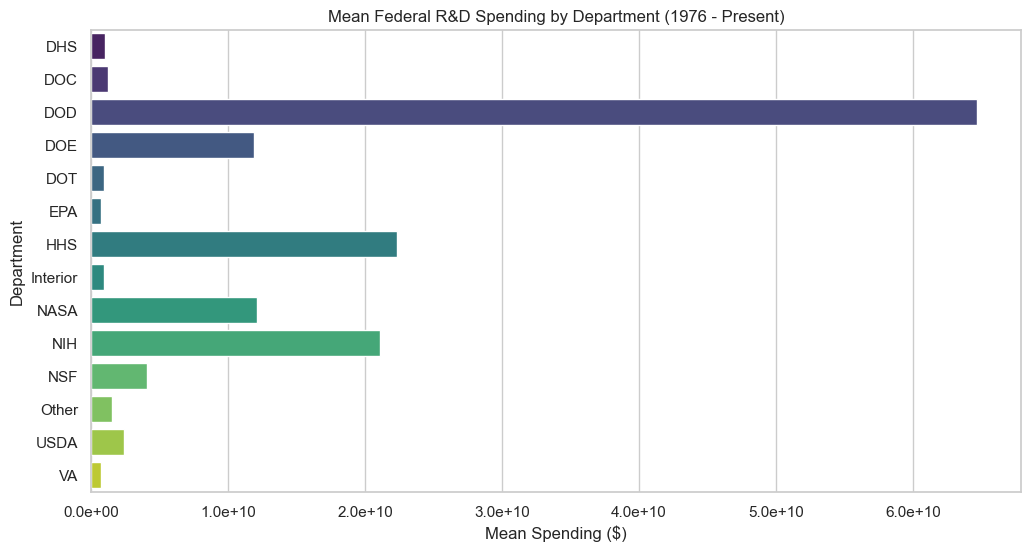

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter as ff

plt.figure(figsize=(12, 6))
sns.barplot(x=mean_spending.values, y=mean_spending.index, palette='viridis')
plt.title('Mean Federal R&D Spending by Department (1976 - Present)')
plt.xlabel('Mean Spending ($)')
plt.gca().xaxis.set_major_formatter(ff(lambda x, _: f'{x:.1e}'))
plt.ylabel('Department')
plt.show()

### 4. Data Vis 2: Spending Over Time
Now lets go back to the original table to see how the spending has changed over time. 

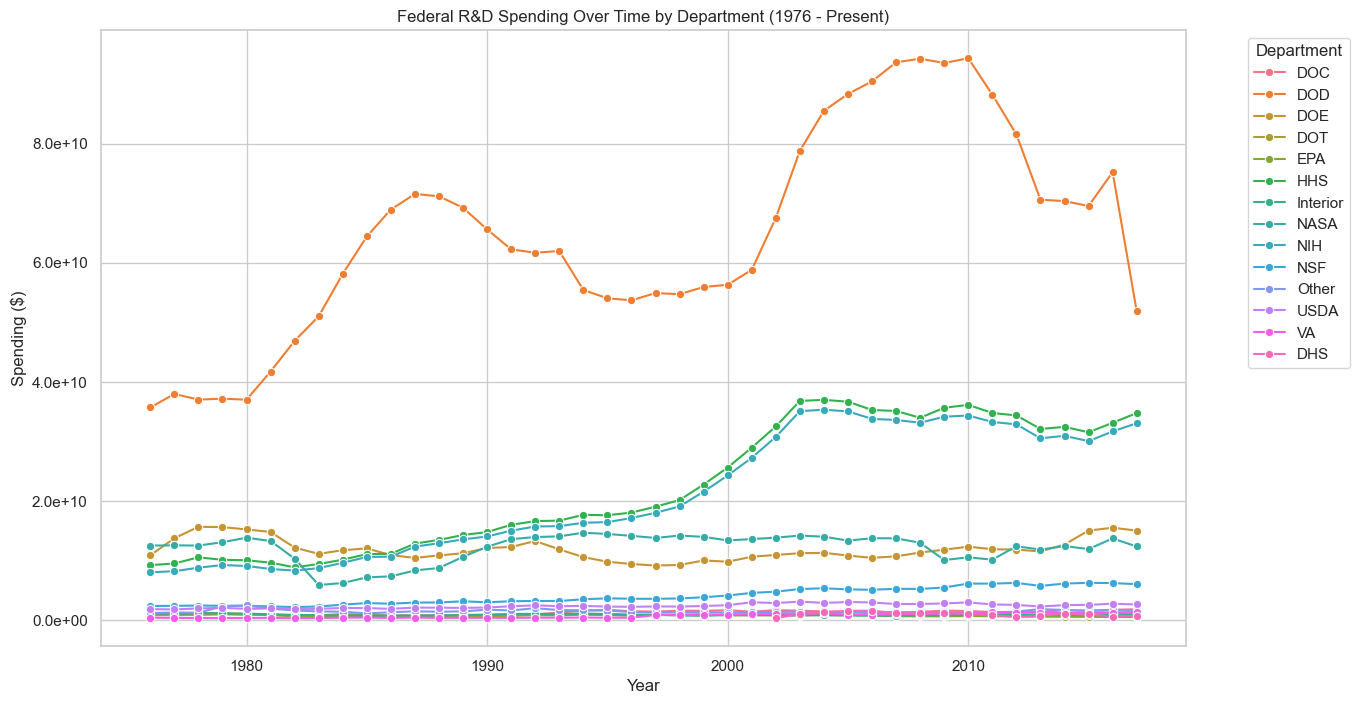

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter as ff

# Line plot of spending over time by department
sns.set_theme(style="whitegrid")
plt.figure(figsize=(14, 8))
sns.lineplot(data=tidy_df_foraggregation, x='year', y='value', hue='department', marker='o')

# Add labels and title
plt.title('Federal R&D Spending Over Time by Department (1976 - Present)')
plt.xlabel('Year'yn
plt.ylabel('Spending ($)')
plt.gca().yaxis.set_major_formatter(ff(lambda x, _: f'{x:.1e}'))
plt.legend(title='Department', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.show()